In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

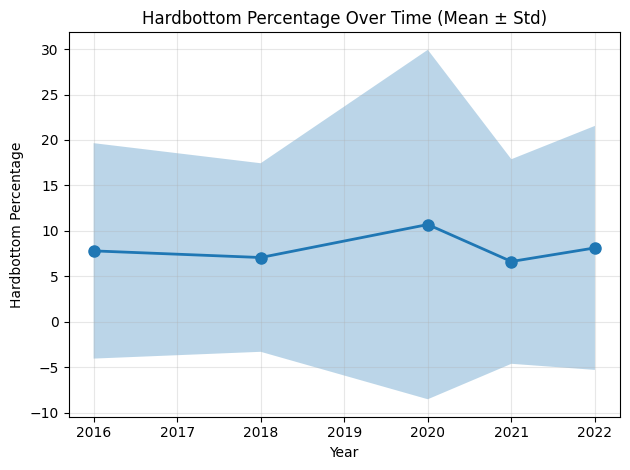

In [ ]:
curr_dir = os.getcwd()
parent_dir = os.path.join(curr_dir, "..", "..")
parent_dir_abs = os.path.abspath(parent_dir)

df = pd.read_csv(parent_dir_abs + "/data/processed/CORIS_DATA/ATLANTIC/FLORIDA/Benthic_Cover_Florida_Cleaned.csv")
df = df[df["HARDBOTTOM_P"] != "percent"]
df["HARDBOTTOM_P"] = pd.to_numeric(
    df["HARDBOTTOM_P"],
    errors="coerce"
)

yearly_stats = df.groupby("YEAR")["HARDBOTTOM_P"].agg(['mean', 'std', 'count'])

plt.plot(yearly_stats.index, yearly_stats['mean'], marker='o', linewidth=2, markersize=8)
plt.fill_between(yearly_stats.index, 
                  yearly_stats['mean'] - yearly_stats['std'],
                  yearly_stats['mean'] + yearly_stats['std'],
                  alpha = 0.3)

plt.xlabel("Year")
plt.ylabel("Hardbottom Percentage")
plt.title("Hardbottom Percentage Over Time (Mean ± Std)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()